# PR18BBKCAP
Project work for Data Mining course at University of Ljubljana - 2018

## Avtorji
  - Blaž Blažinčič
  - Kevin Cvetežar
  - Anže Peharc



## Izbor podatkovne množice
Za projektno nalogo pri Podatkovnem Rudarjenju FRI Ljubljana smo si izbrali "(MBTI) Myers-Briggs Personality Type Dataset" (https://goo.gl/hqd5Nu). "Myers Briggs Type Indicator" je sistem klasifikacije osebnostnega karakterja, kateri deli vsakogar na 16 osebnostnih tipov skozi 4 axiome:

        Introversion (I) – Extroversion (E)
        Intuition (N) – Sensing (S)
        Thinking (T) – Feeling (F)
        Judging (J) – Perceiving (P)

Torej v primeru nekoga, ki se nagiba k "Extroversion", "Intuition", "Thinking" ter "Perceiving" bi označili kot ENTP v MBTI testu osebnosti. Obstaja veliko elementov, ki temeljijo na osebnosti, ki bi lahko modelirali ali opisali želje ali vedenje te osebe na podlagi oznake. Je eden izmed najbolj priljubljenih testov osebnosti na svetu. Uporablja se v podjetjih, na spletu, za zabavo, za raziskave in še veliko več. Na spletu lahko najdemo veliko različnih uporab tega testa in lahko rečemo, da je ta test osebnosti še vedno zelo veljaven in uporaben.
    

# Oblika podatkov

Kaggle zbirka podatkov, ki jih bomo uporabili vsebuje 8676 vrstic podatkov. Vsaka vrstica vsebuje:

    Tip (MBTI koda z 4 črkami, ki opisuje osebnost) (STRING)
    Del vsakega od zadnjih 50 komentarjev, ki so jih objavili (vsak vnos je ločen z "|||") (STRING)
    
# Naša vprašanja oz. primeri uporabe zbirke podatkov

   - **Ali lahko z ML-jem ocenimo veljavnost MBTI testa osebnosti in njegove sposobnosti pri napovedovanju osebnosti na spletu?**
   
   - **Ali lahko ustvarimo ML model, ki bo lahko najbolj uspešno napovedal MBTI osebnost osebe glede na njegove/njene zapise oz.  komentarje?**

Žal vsebuje zbirka podatkov komentarje le v angleščini, zatorej bo klasifikacija slovenskih komentarjev v osnovni fazi nemogoča. Kljub temu pa nam to predstavlja priložnost, da preko "web-scrapping"-a in po uspešno ustvarjenem in robustnim modelom poskušamo klasificirati uporabnike na svetovnem spletu.

Za evaluacijo naših MBTI osebnosti bomo uporabili še test osebnosti na spletni strani 16 Personalities (https://www.16personalities.com/free-personality-test), katera pravtako uporablja MBTI sistem klasifikacije osebnostnega karakterja in je ena izmed najbolj popularnih spletnih strani za napovedovanje MBTI karakterja.


# Inicializacija podatkov

Začnimo najprej z inicializacijo podatkov in branjem iz .csv datoteke. Za lažje delo in manipulacijo podatkov si bomo pomagali z knjižnicami pandas in numpy za delo z podatki ter seaborn in matplotlib za vizualizacijo podatkov. V prihodnje bomo za gradnjo modelov in evaluacijo klasifikacijske točnosti ter ostalo validacijo uporabili še popularno knjižnico scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/mbti_1.csv')
df.head()

## Splitamo vsak komentar za varianco oz. odstopanje
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

print(df.head(20))

    type                                              posts
0   INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1   ENTP  'I'm finding the lack of me in these posts ver...
2   INTP  'Good one  _____   https://www.youtube.com/wat...
3   INTJ  'Dear INTP,   I enjoyed our conversation the o...
4   ENTJ  'You're fired.|||That's another silly misconce...
5   INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6   INFJ  'No, I can't draw on my own nails (haha). Thos...
7   INTJ  'I tend to build up a collection of things on ...
8   INFJ  I'm not sure, that's a good question. The dist...
9   INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
10  INFJ  'One time my parents were fighting over my dad...
11  ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
12  INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...
13  INTJ  'Fair enough, if that's how you want to look a...
14  INTP  'Basically this...  https://youtu.be/1pH5c1Jkh...
15  INTP  'Your comment screams INTJ, br

Kot lahko razberemo iz začetnega podatkovnega niza vidimo, da vsebuje naša podatkovna množica primarno dva stolpca podatkov skupaj z indeks vrednostjo. To sta type in posts. Vsaka vrstica v tabeli pripada eni osebi. Ta oseba je klasificirana z določenim MBTI tipom osebnosti, komentarji pa se delijo glede na '|||' niz karakterjev.

## Pregled osnovnih podatkov in relevantnosti

V začetni observaciji podatkov nas mogoče zanima število oseb ter komentarjev glede na osebo. Kot lahko opazimo spodaj, se števila besed glede na osebo razlikujejo, število komentarjev je pa v večji meri enako. Razlog za to je sama struktura podatkovne množice in sicer maksimalno 50 komentarjev glede na osebo.

In [2]:
## 
df['words_per_person'] = df['posts'].apply(lambda x: len(x.split()))
df['comments_per_person'] = df['posts'].apply(lambda x: len(x.split('|||')))
df[['words_per_person','comments_per_person']]
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
print(df.head(10))

   type                                              posts  words_per_person  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...               556   
1  ENTP  'I'm finding the lack of me in these posts ver...              1170   
2  INTP  'Good one  _____   https://www.youtube.com/wat...               836   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              1064   
4  ENTJ  'You're fired.|||That's another silly misconce...               967   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              1491   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              1329   
7  INTJ  'I tend to build up a collection of things on ...              1223   
8  INFJ  I'm not sure, that's a good question. The dist...               738   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              1233   

   comments_per_person  variance_of_word_counts  
0                   50                 135.2900  
1                  

V osnovi nas zanima distribucija podatkov glede na število besed na osebo za vsak MBTI tip posebej.

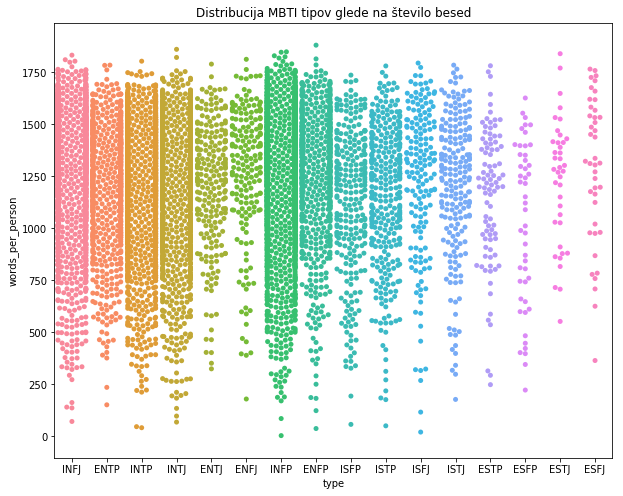

In [3]:
plt.figure(figsize=(10,8))
plt.title("Distribucija MBTI tipov glede na število besed")
sns.swarmplot("type", "words_per_person", data=df)

In [4]:
df2 = df
df2['http_per_comment'] = df2['posts'].apply(lambda x: x.count('http'))
df2['qm_per_comment'] = df2['posts'].apply(lambda x: x.count('?'))
df2[['http_per_comment','qm_per_comment']]
df2['qm_per_comment_additional'] = df2['posts'].apply(lambda x: x.count('?|||') + x.count('? ') + x.count(' ?'))

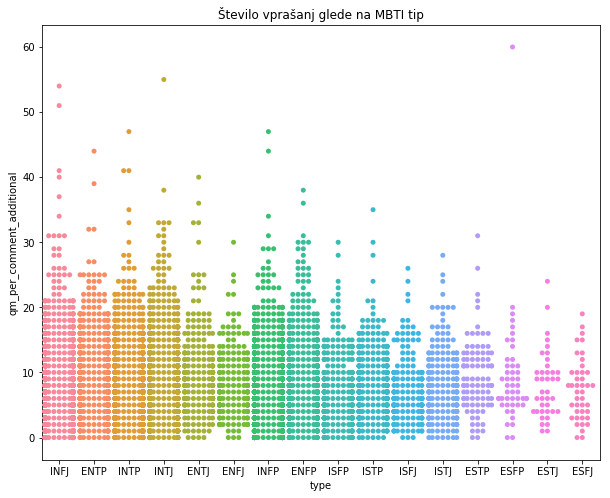

In [5]:
plt.figure(figsize=(10,8))
plt.title("Število vprašanj glede na MBTI tip")       
sns.swarmplot("type", "qm_per_comment_additional", data=df2)

## NLP (Natural Language Processing) Procesiranje naravnega jezika

**Pri tem poglavju smo imeli največ dela. Sprva se nam je zdela naloga relativno nezahtevna, vendar smo videli, da je potrebno vključiti principe procesiranja naravnega jezika za najboljše rezultate. Pomagali smo si z knjižnico NLTK, ki je narejena za takšno delo ter vsebuje mnogo funkciji, ki pomagajo pri odkrivanju novih vektorjev ter že ima mnogo sestavljenih korpusov besed ter različnih klasifikacij.**

Poleg spodnje kode smo tudi naredili korenjenje besed (***angl. stemming***) in lematiziranje (***angl. lemmatizing***) na originalni množici podatkov. Ostalo kodo si lahko ogledate v preostalih datotekah v tem repozitoriju. (nlp.py je glavni)

**Spodaj smo prebrali consolidirano podatkovno množico, ki smo jo predtem ustvarili. Razbili smo komentarje na vsakega posebej za lažjo in bolj učinkovito delo ter napoved.**

In [27]:
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# funkcija za ocenitev kvalitete pridobljenega vektorja za napoved
def fq_barplot(df, feature):
    dffunc = pd.concat([df, pd.DataFrame({'ax{}'.format(i): df['type'].astype(str).str[i] for i in range(4)})], axis=1)
    fig, ax = plt.subplots(2,2,figsize=(10,8))
    ax = ax.flatten()
    fig.suptitle('Kvaliteta vektorja = '+feature)
    sns.set(style="white", color_codes=True)
    for i in range(4):
        sns.barplot(x='ax{}'.format(i), y=feature, data=dffunc, ax=ax[i], ci='sd')

dfcon = pd.read_csv("mbti_consolidated2.csv", encoding="latin1") #Z http linki.
dfcon.dropna(axis=0, inplace=True)
dfcon = dfcon[['index', 'type', 'post', 'uid', 'post_length']]

dfcon.head(20)

,index,type,post,uid,post_length
0,0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw,0,42
1,1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,0,61
2,2,INFJ,enfp and intj moments https://www.youtube.com...,0,151
3,3,INFJ,What has been the most life-changing experienc...,0,61
4,4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,0,117
5,5,INFJ,May the PerC Experience immerse you.,0,36
6,6,INFJ,The last thing my INFJ friend posted on his fa...,0,135
7,7,INFJ,Hello ENFJ7. Sorry to hear of your distress. I...,0,200
8,8,INFJ,84389 84390 http://wallpaperpassion.com/uplo...,0,171
9,9,INFJ,Welcome and stuff.,0,18


**Naredili smo tudi ocene sentimenta oz. ocene pozitivnosti ali negativnosti komentarja. To je samo en del NLP, ki nam lahko pomaga odkriti dodatne zanimivosti v tekstu in tudi pomaga pri zgradbi modela.**

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize

sentinan = SentimentIntensityAnalyzer()
sentences = []
for i, row in dfcon.iterrows():
    ss = sentinan.polarity_scores(str(row['post']))
    ssarray = [ss['neg'],ss['neu'],ss['pos'], ss['compound']]
    sentences.append(ssarray)   

Spodaj lahko vidimo pozitivne, negativne ali nevtralne ocene komentarja, ki nam jih je SentimentIntensityAnalyzer izračunal.

In [17]:
polar = pd.DataFrame(data=sentences, columns=['neg', 'neu', 'pos', 'compound'])
polar.reset_index(drop=True,inplace=True)
polartemp = pd.merge(dfcon, polar, left_index=True, right_index=True)  
dfpolar = polartemp.copy()

dfpolar[['type', 'post', 'neg', 'neu', 'pos', 'compound']][:20]

,type,post,neg,neu,pos,compound
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw,0.000,1.000,0.000,0.0000
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,0.000,1.000,0.000,0.0000
2,INFJ,enfp and intj moments https://www.youtube.com...,0.270,0.730,0.000,-0.4003
3,INFJ,What has been the most life-changing experienc...,0.000,1.000,0.000,0.0000
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,0.000,1.000,0.000,0.0000
5,INFJ,May the PerC Experience immerse you.,0.000,1.000,0.000,0.0000
6,INFJ,The last thing my INFJ friend posted on his fa...,0.173,0.654,0.173,-0.2500
7,INFJ,Hello ENFJ7. Sorry to hear of your distress. I...,0.206,0.679,0.115,-0.4585
8,INFJ,84389 84390 http://wallpaperpassion.com/uplo...,0.000,1.000,0.000,0.0000
9,INFJ,Welcome and stuff.,0.000,0.400,0.600,0.4588


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dataraw = pd.read_csv('data/mbti_1.csv', encoding='latin1')
data = dataraw.copy()

In [32]:
def evalSGD():
    j=0 #for iterating
    k=1 #for iterating through axioms
    _score = []
    for r in range(4):
        for i in range(len(data)):
            data['type'].values[i] = dataraw['type'].values[i][j:k]
        
        temp = data.copy()
        #temp = temp[['index', 'type', 'post', 'uid']]
        temp.dropna(axis=0, inplace=True)
        
        numpy_array = temp.as_matrix()
        Y = numpy_array[:,0]
        X = numpy_array[:,1]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42)
        
        text_clf_sgd = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=10, random_state=42)),
        ])
        text_clf_sgd = text_clf_sgd.fit(X_train,Y_train)
        predicted_svm = text_clf_sgd.predict(X_test)
        
        j += 1
        k += 1
        _score.append(np.mean(predicted_svm == Y_test))

    ax1 = ax2 = ax3 = ax4 = 0
    ax1 = _score[0]
    ax2 = _score[1]
    ax3 = _score[2]
    ax4 = _score[3]
    print('     Stochastic Gradient Descent Classifier  (Ocene napovedi modela)   ')
    print('-----------------------------------------------------------------------')
    print('Introvert (I) - Extrovert  (E):               {0}'.format(ax1))
    print('Intuition (N) - Sensing    (S):               {0}'.format(ax2))
    print('Thinking  (T) - Feeling    (F):               {0}'.format(ax3))
    print('Judging   (J) - Perceiving (P):               {0}'.format(ax4))

evalSGD()

     Stochastic Gradient Descent Classifier  (Ocene napovedi modela)   
-----------------------------------------------------------------------
Introvert (I) - Extrovert  (E):               0.8006146753745678
Intuition (N) - Sensing    (S):               0.8551671148674607
Thinking  (T) - Feeling    (F):               0.8363426815213215
Judging   (J) - Perceiving (P):               0.7114867460622358


**Najboljše rezultate napovedi smo dobili s SGD Classifier z zgornjimi ocenami za napovedovanje vseh štirih axiomov. Spodaj lahko vidimo še ocene ostalih klasifikatorjev. **

**Podatkovna množica ter narava dela (Procesiranje naravnega jezika) je obsežna tema in bi lahko z več časa preizkusili in ustvarili še bolj kompleksne modele, pravtako tudi te modele praktično uporabili npr. z integracijo Twitter "web scrapping"-a. Definitivno menimo, da projekt še ni v celoti zaključen in ima še prostora rasti v praktične smeri.**